<a href="https://colab.research.google.com/github/srvqgithub/MIS515-Projects/blob/main/MIS515_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%autosave 60

Autosaving every 60 seconds


# AI and Machine Learning Jobs Data Set


Dataset: https://www.kaggle.com/datasets/abhaykumar2812/ai-and-ml-jobs

Columns:

*   Job Title
*   Company
*   Location
*   Type of Position
*   Salary
*   Identified Skills

DATA FRAME CLEANUP:

* Removed Job Description - Data entries irrelevant to analysis.
* Removed Identified Skills - Some entries missing data.
* Removed duplicate data - To provide a more accurate visualization / analysis.



In [ ]:
#Python code to upload files (csv) to Google Colab

from google.colab import files


uploaded = files.upload()

Saving final_job_list.csv to final_job_list.csv


In [ ]:
import pandas as pd

df = pd.read_csv('final_job_list.csv')

print(df)


                                                 Title  \
0                 Staff Applied Scientist, Marketplace   
1    Prompt Engineer for Generative AI (chatbot and...   
2                       Data Systems Analyst/Architect   
3                       AIOps Principle Data Scientist   
4                                   Sr. Data Scientist   
..                                                 ...   
687                      Senior Staff AI Data Engineer   
688                      Senior Staff AI Data Engineer   
689                      Senior Staff AI Data Engineer   
690                      Senior Staff AI Data Engineer   
691                      Senior Staff AI Data Engineer   

                                     Company Location Type of Positions  \
0                               ThredUp Inc.       CA         Full-time   
1                    Vicarious Talent Agency       WA         Full-time   
2    General Dynamics Information Technology   Remote         Full-time   
3  

In [ ]:
import pandas as pd

df = pd.read_csv('final_job_list.csv')

df = df[df['Identified_Skills'] != '[]']

df = df.drop(columns=['Job Description'])
df = df.drop_duplicates()

df


,Title,Company,Location,Type of Positions,Salary,Identified_Skills
0,"Staff Applied Scientist, Marketplace",ThredUp Inc.,CA,Full-time,190000.0,"['python', 'machine learning', 'aws', 'sql']"
1,Prompt Engineer for Generative AI (chatbot and...,Vicarious Talent Agency,WA,Full-time,70000.0,"['python', 'machine learning', 'deep learning'..."
2,Data Systems Analyst/Architect,General Dynamics Information Technology,Remote,Full-time,104000.0,"['machine learning', 'aws', 'azure', 'nosql', ..."
3,AIOps Principle Data Scientist,CVS Health,CT,Full-time,140000.0,"['python', 'machine learning', 'aws', 'gcp']"
4,Sr. Data Scientist,Altak Group,Remote,Full-time,136000.0,"['python', 'machine learning', 'tableau', 'aws..."
...,...,...,...,...,...,...
506,"Scientist I, Computational Biology & Machine L...",Arsenal Biosciences,CA,Full-time,126100.0,"['python', 'machine learning', 'git']"
642,USGS Data Integration Fellowship at the Alaska...,U.S. Department of the Interior (DOI),AK,Full-time,51332.0,"['python', 'pandas']"
643,"Staff Full Stack Software Engineer, Machine Le...",Qualcomm,CA,Full-time,148500.0,"['tensorflow', 'pytorch', 'python', 'machine l..."
644,"Generative Machine Learning Engineer, Senior",Booz Allen Hamilton,MD,Full-time,93300.0,"['python', 'machine learning']"


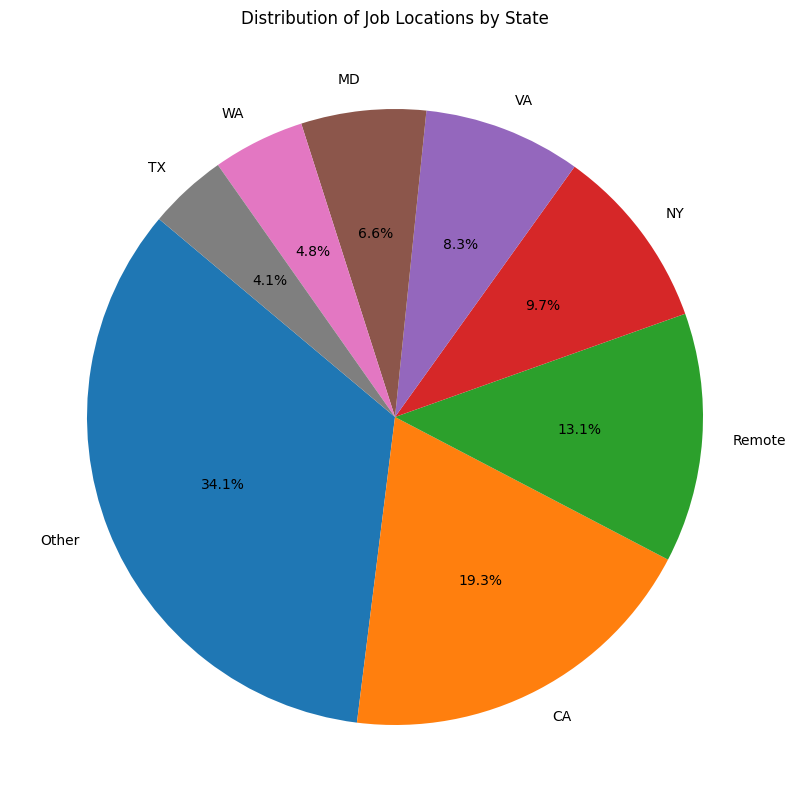

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the DataFrame from CSV
df = pd.read_csv('final_job_list.csv')

# Drop the 'Job Description' column
df = df.drop(columns=['Job Description'])

# Drop duplicates
df = df.drop_duplicates()

# Extract state information from 'Location' column
df['State'] = df['Location'].apply(lambda x: tuple(x.split(',')))

# Count the occurrences of each state
state_counts = df['State'].value_counts()

# Group states with counts less than 3% into 'Other'
threshold = 0.035
states_to_group = state_counts[state_counts < threshold * len(df)]
df['State'] = df['State'].apply(lambda x: ('Other',) if x in states_to_group.index else x)

# Convert tuples back to strings and remove commas
df['State'] = df['State'].apply(lambda x: ' '.join(x).replace(',', '') if isinstance(x, tuple) else x)


# Recalculate state counts after grouping
state_counts = df['State'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(40, 10))
state_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Job Locations by State')
plt.ylabel('', fontsize=16)  # Increase y-label font size
plt.xlabel('', fontsize=16)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.xticks(fontsize=16)  # Increase tick label font size
plt.yticks(fontsize=16)
plt.show()


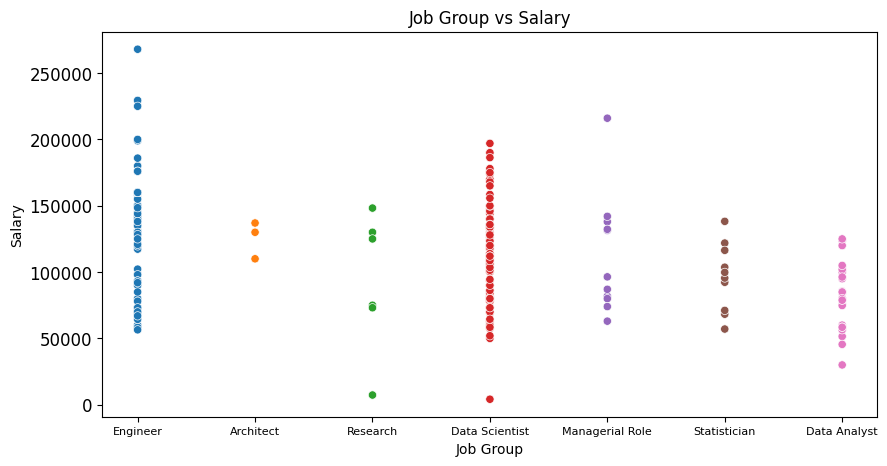

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the DataFrame from CSV
df = pd.read_csv('final_job_list.csv')

# Drop the 'Job Description' column
df = df.drop(columns=['Job Description'])

# Drop duplicates
df = df.drop_duplicates()

# Sort by job title
df = df.sort_values('Title')

# Define the job groups
job_groups = {
    'Scientist': 'Data Scientist',
    'Analyst': 'Data Analyst',
    'Engineer': 'Engineer',
    'Statistician': 'Statistician',
    'Research': 'Research',
    'Architect': 'Architect',
    'Manager': 'Managerial Role',
}

# Create a new column 'Job Group' based on 'Job Title'
df['Job Group'] = df['Title'].apply(lambda x: next((group for keyword, group in job_groups.items() if keyword.lower() in x.lower()), None))

df.sort_values('Job Group')

df.to_csv('Grouped.csv')

#Drop rows where 'Job Group' is None
df = df.dropna(subset=['Job Group'])

#Group Data by 'Job Group'
grouped_df = df.groupby('Job Group')

#Create scatterplot
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='Job Group', y='Salary', hue='Job Group', legend=False)
plt.title("Job Group vs Salary")
plt.rc('ytick', labelsize=12)



#df.to_csv('Grouped.csv')




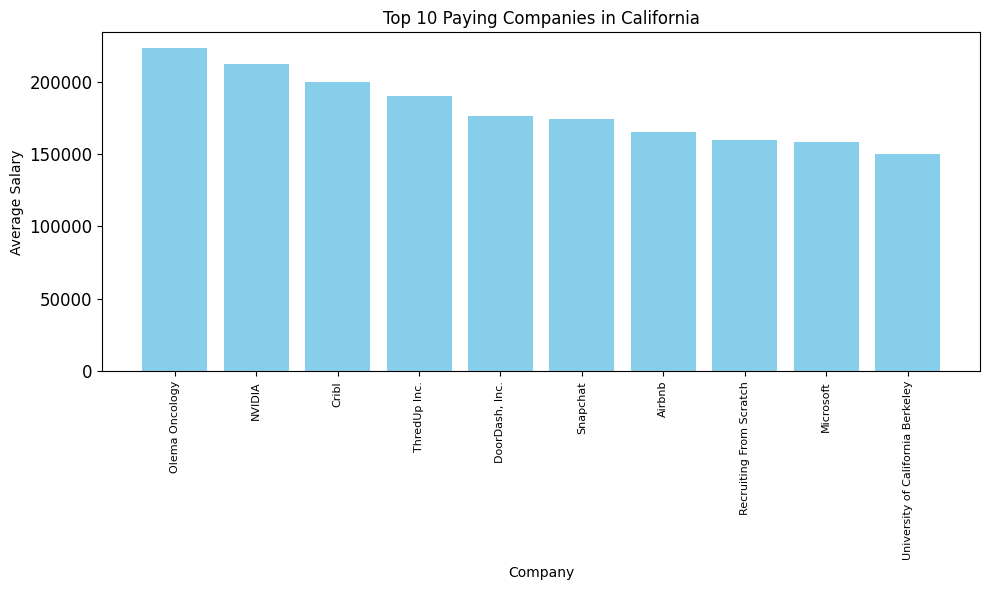

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('final_job_list.csv')

# Filter the data to include only job listings from California
california_jobs = df[df['Location'] == 'CA']

# Remove rows where 'Salary' is NaN
california_jobs = california_jobs.dropna(subset=['Salary'])

# Group by company and calculate the average salary for each company
avg_salary_by_company = california_jobs.groupby('Company')['Salary'].mean().reset_index()

# Sort DataFrame by average salary in descending order
avg_salary_by_company = avg_salary_by_company.sort_values(by='Salary', ascending=False)

# Select top 10 paying companies
top_10_companies = avg_salary_by_company.head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_10_companies['Company'], top_10_companies['Salary'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Company')
plt.ylabel('Average Salary')
plt.title('Top 10 Paying Companies in California')
plt.tight_layout()
plt.show()


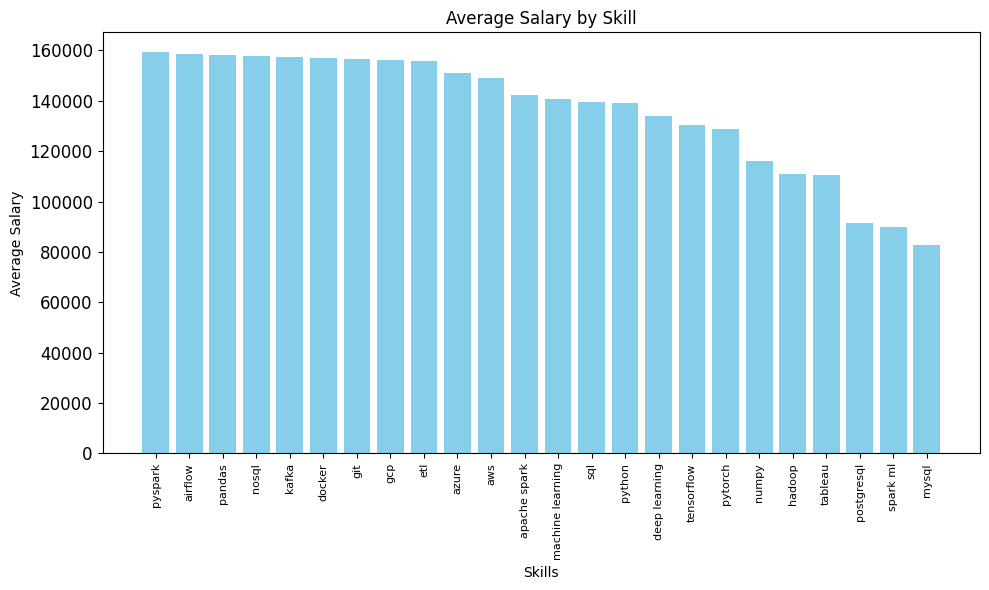

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV file
df = pd.read_csv('final_job_list.csv')

# Filter out rows with empty data in Identified_Skills
df = df[df['Identified_Skills'] != '[]']

# Converts 'Identified_Skills' column from string representation to list
df['Identified_Skills'] = df['Identified_Skills'].apply(eval)

# Create an empty dictionary for average salary for each skill
avg_salary_by_skill = {}

# Iterate through each row and calculate the average salary for each skill
for index, row in df.iterrows():
    skills = row['Identified_Skills']
    salary = row['Salary']
    for skill in skills:
        if skill not in avg_salary_by_skill:
            avg_salary_by_skill[skill] = [salary]
        else:
            avg_salary_by_skill[skill].append(salary)

# Calculate average salary for each skill
for skill, salaries in avg_salary_by_skill.items():
    avg_salary_by_skill[skill] = sum(salaries) / len(salaries)

# Create a Dataframe from dictionary
avg_salary_df = pd.DataFrame(list(avg_salary_by_skill.items()), columns=['Skill', 'Average Salary'])

# Sort by average salary
avg_salary_df = avg_salary_df.sort_values(by='Average Salary', ascending=False)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(avg_salary_df['Skill'], avg_salary_df['Average Salary'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Skills')
plt.ylabel('Average Salary')
plt.title('Average Salary by Skill')
plt.tight_layout()
plt.show()


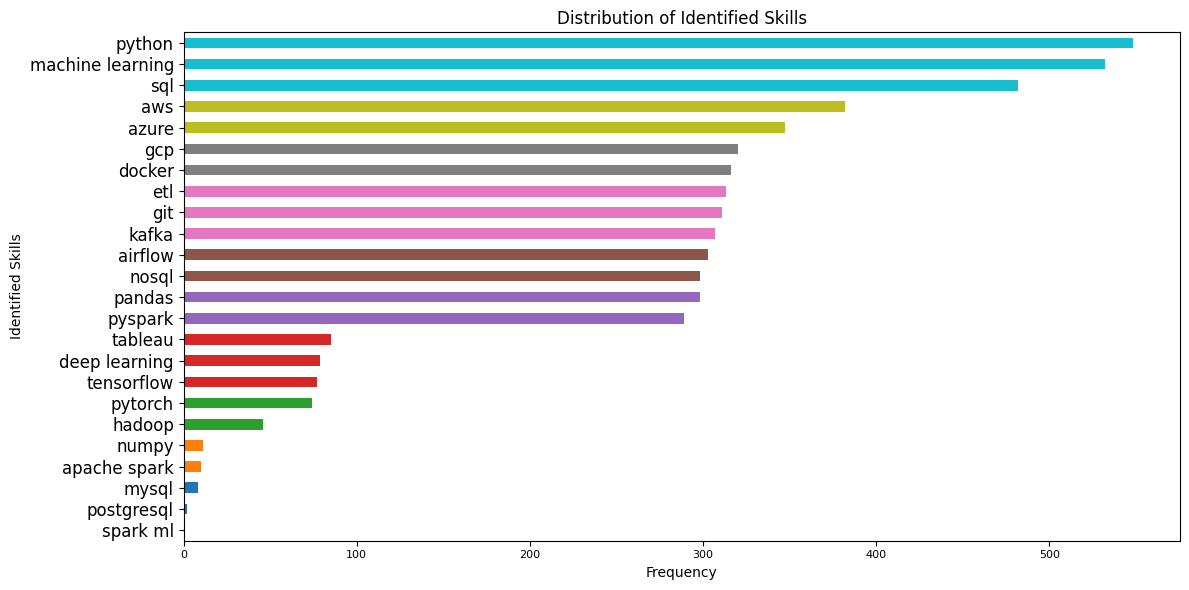

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('final_job_list.csv')

# Convert the 'Identified_Skills' column from string representation of list to list
df['Identified_Skills'] = df['Identified_Skills'].apply(eval)

# Extract all skills from the 'Identified_Skills' column and create a list of all skills
all_skills = [skill for sublist in df['Identified_Skills'] for skill in sublist]

# Count the frequency of each skill
skill_counts = pd.Series(all_skills).value_counts()

# Sort the skills based on their frequency
skill_counts_sorted = skill_counts.sort_values()

# Plotting the graph
colors = plt.cm.tab10(np.linspace(0, 1, len(skill_counts_sorted)))
plt.figure(figsize=(12, 6))
skill_counts_sorted.plot(kind='barh', color=colors)
plt.xlabel('Frequency')
plt.ylabel('Identified Skills')
plt.title('Distribution of Identified Skills')
plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


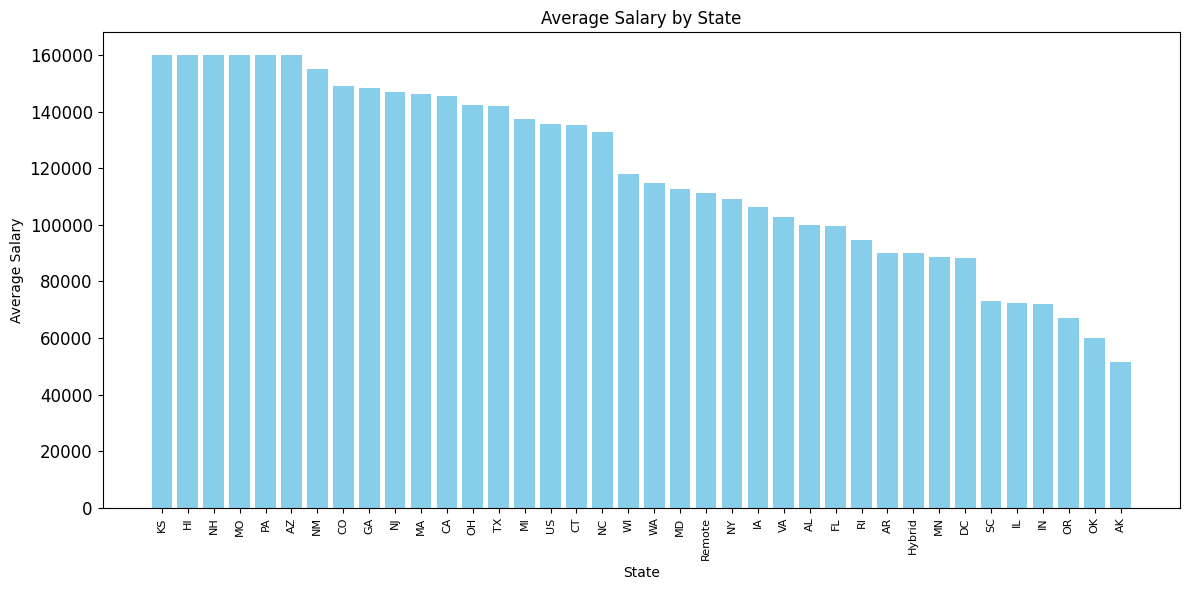

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('final_job_list.csv')

df = df.dropna(subset=['Salary'])

avg_salary_by_state = df.groupby('Location')['Salary'].mean().reset_index()

avg_salary_by_state = avg_salary_by_state.sort_values(by='Salary', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(avg_salary_by_state['Location'], avg_salary_by_state['Salary'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Average Salary')
plt.title('Average Salary by State')
plt.tight_layout()
plt.show()


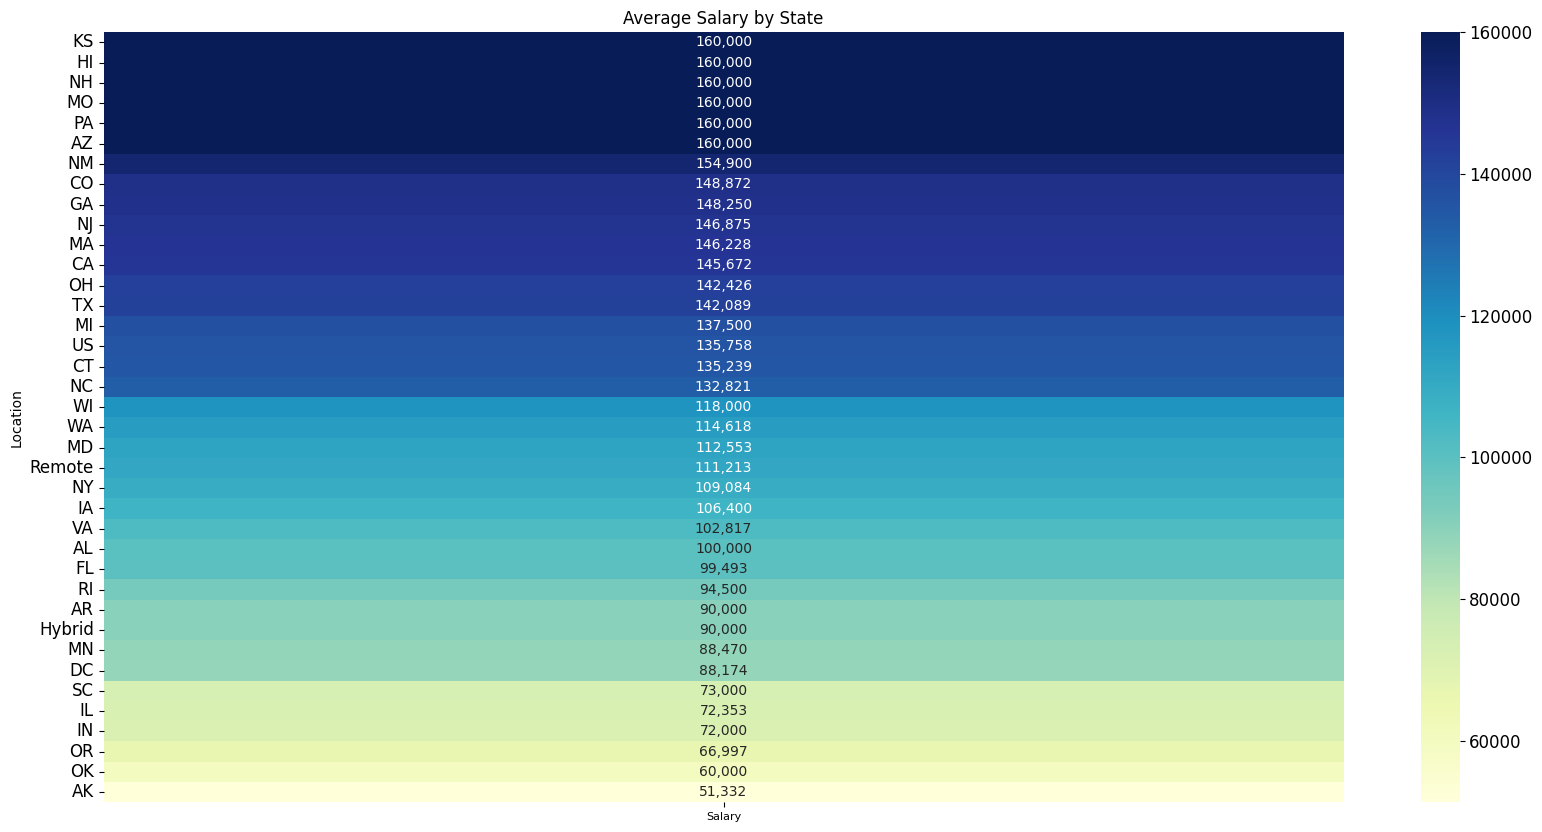

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('final_job_list.csv')

# Remove rows where 'Salary' is NaN
df = df.dropna(subset=['Salary'])

# Group by state and calculate the average salary for each state
avg_salary_by_state = df.groupby('Location')['Salary'].mean().reset_index()

# Sort DataFrame by average salary in descending order
avg_salary_by_state = avg_salary_by_state.sort_values(by='Salary', ascending=False)

# Create a DataFrame with states as index and 'Salary' as column
heatmap_data = pd.DataFrame(avg_salary_by_state['Salary'].values, index=avg_salary_by_state['Location'], columns=['Salary'])

# Create a heatmap
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=",.0f", ax=ax)

plt.title('Average Salary by State')
plt.show()


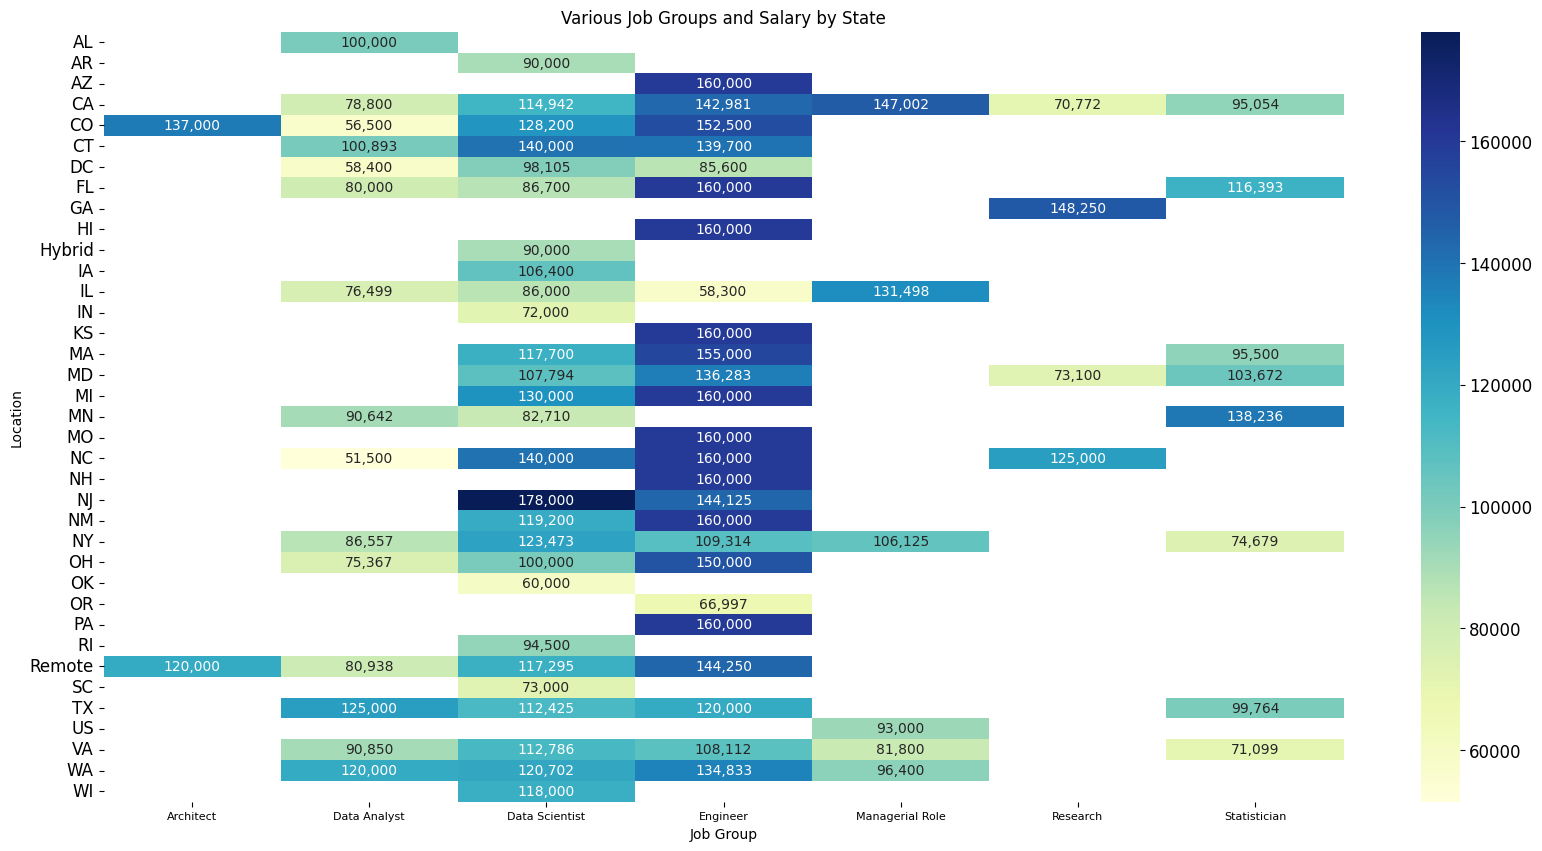

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the DataFrame from CSV
df = pd.read_csv('final_job_list.csv')

# Drop the 'Job Description' column
df = df.drop(columns=['Job Description'])

# Drop duplicates
df = df.drop_duplicates()

# Define the job groups
job_groups = {
    'Scientist': 'Data Scientist',
    'Analyst': 'Data Analyst',
    'Engineer': 'Engineer',
    'Statistician': 'Statistician',
    'Research': 'Research',
    'Architect': 'Architect',
    'Manager': 'Managerial Role',
}

# Create a new column 'Job Group' based on 'Job Title'
df['Job Group'] = df['Title'].apply(lambda x: next((group for keyword, group in job_groups.items() if keyword.lower() in x.lower()), None))

# Drop rows where 'Job Group' is None
df = df.dropna(subset=['Job Group'])

# Remove rows where 'Salary' is NaN
df = df.dropna(subset=['Salary'])

# Group by state and job group, then calculate the average salary for each group
avg_salary_by_state_and_group = df.groupby(['Location', 'Job Group'])['Salary'].mean().reset_index()

# Sort DataFrame by average salary in descending order
avg_salary_by_state_and_group = avg_salary_by_state_and_group.sort_values(by='Salary', ascending=False)

# Pivot the DataFrame to prepare for the heatmap
heatmap_data = avg_salary_by_state_and_group.pivot(index='Location', columns='Job Group', values='Salary')

# Create a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=",.0f", annot_kws={"size": 10})
plt.title('Various Job Groups and Salary by State')
plt.show()
